# Implementing a perceptron learning algorithm in Python

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 24). Packt Publishing. Kindle Edition. 

#### Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model (F. Rosenblatt, The Perceptron, a Perceiving and Recognizing Automaton. Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 19). Packt Publishing. Kindle Edition. 

#### In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belonged to one class or the other. More formally, we can pose this problem as a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 19). Packt Publishing. Kindle Edition. 

#### The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps: Initialize the weights to 0 or small random numbers. For each training sample perform the following steps: Compute the output value . Update the weights.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 21). Packt Publishing. Kindle Edition. 

## Perceptron Class

In [2]:
import numpy as np

In [1]:
class Perceptron(object):
    '''
    Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    '''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        X : [array-like], shape = [n_samples, n_features]
            Training vectors, where n_samples is the number
            of samples and n_featurs is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Load Data Set

#### First, we will use the pandas library to load the Iris dataset directly from the UCI Machine Learning Repository into a DataFrame object and print the last five lines via the tail method to check that the data was loaded correctly:

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 28). Packt Publishing. Kindle Edition. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#### initial examination of data set

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively, and convert the class labels into the two integer class labels 1 (Versicolor) and -1 (Setosa) that we assign to a vector y where the values method of a pandas DataFrame yields the corresponding NumPy representation. Similarly, we extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix X, which we can visualize via a two-dimensional scatter plot:

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 28). Packt Publishing. Kindle Edition.

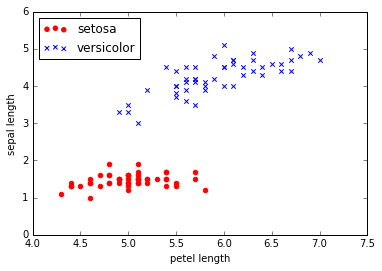

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
X=df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('petel length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

#### Now it's time to train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes:

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 29). Packt Publishing. Kindle Edition. 

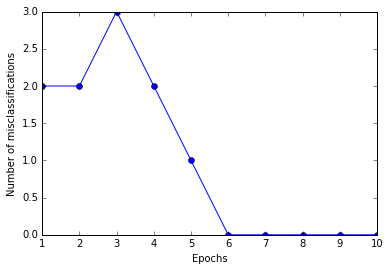

In [7]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

#### Let us implement a small convenience function to visualize the decision boundaries for 2D datasets:

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 30). Packt Publishing. Kindle Edition. 

In [8]:
%matplotlib inline
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max, resolution),
                        np.arange(x2_min,x2_max, resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

####     After reshaping the predicted class labels Z into a grid with the same dimensions as xx1 and xx2, we can now draw a contour plot via matplotlib's contourf function that maps the different decision regions to different colors for each predicted class in the grid array.

Raschka, Sebastian (2015-09-23). Python Machine Learning (p. 31). 
Packt Publishing. Kindle Edition.

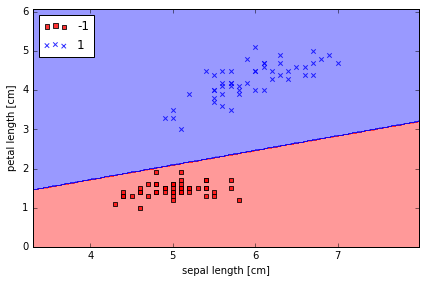

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()